# Drug Classification - Comparison of Machine Learning Models
Katlyn Goeujon-Mackness <br>
06/05/2026

## Introduction
# Drug Classification - Comparison of Machine Learning Models

## Introduction

Imagine you are a medical researcher collecting data for a study. You have collected data on a group of patients, all with the same disease.

During their treatment, each patient responded to one of five medications:
* Drug A
* Drug B
* Drug C
* Drug X
* Drug Y

Part of your job is to build a model to determine which medication might be appropriate for a future patient with the same disease.

In this project, we explore different machine learning algorithms to predict the most suitable drug for a patient based on various health indicators. Using classification techniques, we analyze how factors such as age, blood pressure, cholesterol levels, and sodium-to-potassium ratio influence drug recommendations.

### Objectives:
- Implement and compare multiple **classification models**.
- Evaluate **performance metrics** to determine the most effective approach.
- Utilize **data visualization** to interpret patterns in drug prescriptions.

Through this analysis, we aim to optimize drug selection and provide **data-driven insights** into medication recommendations.

### Classification Algorithms
We will explore the following classification algorithms:
- Logistic Regression
- Decision Trees
- Random Forest & Gradient Boosted Trees Classifiers
- K-Nearest Neighbors

### Project Structure

1. Data Exploration
   - Loading the dataset
   - Understanding data structure
   - Handling missing values

2. Data Preprocessing
   - Encoding categorical variables
   - Feature scaling and transformation
   - Splitting dataset into train/test sets

3. Exploratory Data Analysis (EDA)
   - Visualizing distributions (histograms, box plots)
   - Correlation analysis
   - Insights from data

4. Model Selection & Training
   - Choosing classification models (e.g., Logistic Regression, Decision Trees, Random Forests)
   - Implementing machine learning algorithms
   - Performance evaluation metrics

5. Model Comparison
   - Comparing accuracy, precision, recall, and F1-score
   - Hyperparameter tuning (Grid Search, Random Search)
   - Feature importance analysis

6. Conclusion
   - Best-performing model summary
   - Potential improvements
   - Future applications of drug classification

## Data Exploration
To begin the analysis, we will load and explore the dataset to understand its structure and handle missing values.

In [187]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [188]:
# Load the dataset
drugs = pd.read_csv("data/drugs.csv")
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Column Descriptions
- **Age**: Age of patient (numeric)
- **Sex**: Sex of patient (F/M)
- **BP**: Blood pressure of patient (LOW/NORMAL/HIGH)
- **Cholesterol**: Cholesterol of patient (HIGH/NORMAL)
- **Na_to_K**: Sodium to potassium level of patient (numeric)
- **Drug**: Drug actually prescribed by the doctor (A, B, C are domestic; X, Y are international)

In [189]:
# Show summary statistics
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [190]:
# Display basic information including missing values
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Comments
- No values are missing from the dataset. 
- Numerical features have the appropriate type. 
- Categorical data must be codified for analysis.

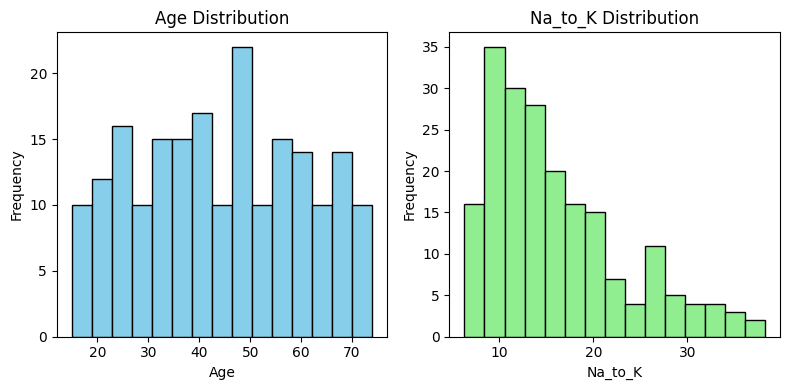

In [191]:
# Distribution of Numerical Features
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot Age distribution
axes[0].hist(drugs['Age'], bins=15, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot Na_to_K distribution
axes[1].hist(drugs['Na_to_K'], bins=15, color='lightgreen', edgecolor='black')
axes[1].set_title('Na_to_K Distribution')
axes[1].set_xlabel('Na_to_K')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

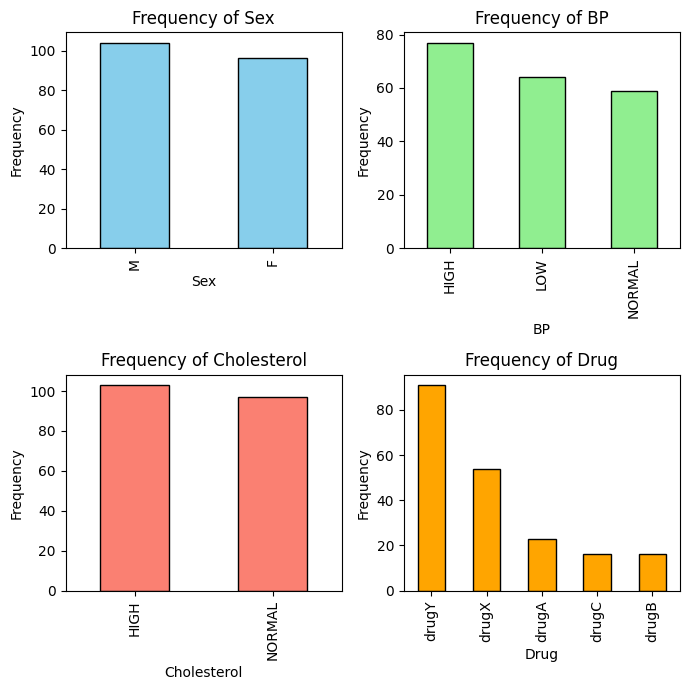

In [192]:
# Distribution of Categorical Features
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

# Plot for Sex
drugs['Sex'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Frequency of Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Frequency')

# Plot for BP
drugs['BP'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Frequency of BP')
axes[0, 1].set_xlabel('BP')
axes[0, 1].set_ylabel('Frequency')

# Plot for Cholesterol
drugs['Cholesterol'].value_counts().plot(kind='bar', ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('Frequency of Cholesterol')
axes[1, 0].set_xlabel('Cholesterol')
axes[1, 0].set_ylabel('Frequency')

# Plot for Drug
drugs['Drug'].value_counts().plot(kind='bar', ax=axes[1, 1], color='orange', edgecolor='black')
axes[1, 1].set_title('Frequency of Drug')
axes[1, 1].set_xlabel('Drug')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

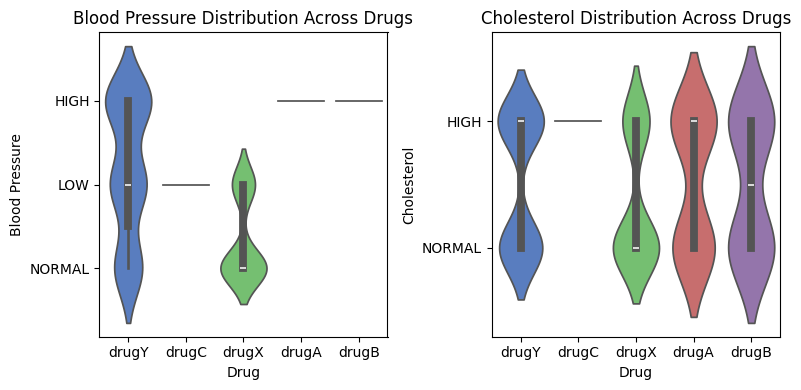

In [193]:
# Violin plots comparing the distribution of Blood Pressure and Cholesterol across different drugs
# Set the figure size
plt.figure(figsize=(8, 4))

# Create a subplot for Blood Pressure vs Drug
plt.subplot(1, 2, 1)
sns.violinplot(x='Drug', y='BP', data=drugs, palette='muted', scale='count')
plt.title('Blood Pressure Distribution Across Drugs')
plt.xlabel('Drug')
plt.ylabel('Blood Pressure')

# Create a subplot for Cholesterol vs Drug
plt.subplot(1, 2, 2)
sns.violinplot(x='Drug', y='Cholesterol', data=drugs, palette='muted', scale='count')
plt.title('Cholesterol Distribution Across Drugs')
plt.xlabel('Drug')
plt.ylabel('Cholesterol')

plt.tight_layout()
plt.show()

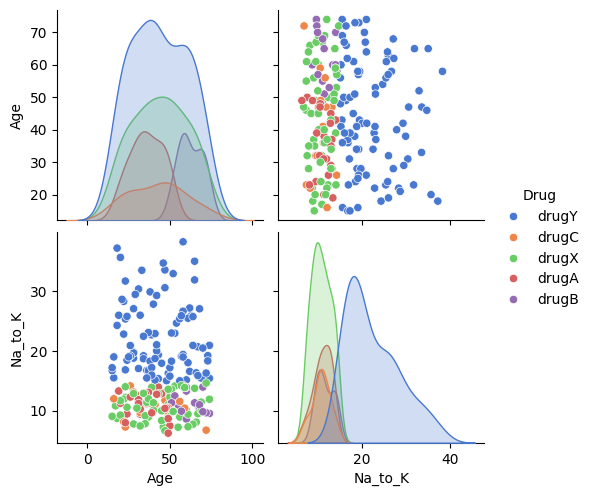

In [194]:
# Visualize distributions and correlations between drugs
sns.pairplot(drugs, hue='Drug', diag_kind='kde', palette='muted')
plt.show()

## Data Preprocessing
Now that we understand the structure of the data, some processing needs to be undertaken to prepare the data for modeling. This includes:
- Encoding categorical variables
- Feature scaling and transformation
- Splitting dataset into train/test sets

In [195]:
# Set the feature columns and target variable (y)
feature_cols = ["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]
X = drugs.drop("Drug", axis=1)
y = drugs['Drug']

In [196]:
# Encoding categorical variables
# Convert categories into numbers using label encoding
labels = {}
numerical_features = ["Age", "Na_to_K"]
categorical_features = ["Sex", "BP", "Cholesterol"]

for feature in categorical_features:
    le = LabelEncoder()
    drugs[feature] = le.fit_transform(drugs[feature])
    # Store encoder for later
    labels[feature] = le

# Update X with the transformed values
X = drugs[feature_cols].values

In [197]:
# Preview X to make sure it looks good
X[:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [198]:
# Feature scaling
# Standardize Na_to_K to ensure consistent modeling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [199]:
# Divide dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Model Selection & Training
- Choosing classification models (e.g., Logistic Regression, Decision Trees, Random Forests)
- Implementing machine learning algorithms
- Performance evaluation metrics

### Logistic Regression
The first model to look at is logistic regression. Within this model, we can use a solver algorithm to optimize its parameters. Here, we train various logistic regression solvers and evaluate them to find which one performs the best for our classification task.

In [200]:
# Create a function to compare the solvers and find the best one for the data
def model_optimizer(solvers):
    """Compares multiple solvers and selects the best one based on accuracy"""
    
    results = []

    for solver in solvers:
        # Initialize and train the model
        model = LogisticRegression(solver=solver)
        model.fit(X_train, y_train)

        # Predict class labels on test data
        y_pred = model.predict(X_test)

        # Test the accuracy of the prediciont
        accuracy = accuracy_score(y_test, y_pred)
        classification = classification_report(y_test, y_pred)
    
        results.append({
            "Solver": solver,
            "Accuracy": accuracy,
            "Classification": classification,
            "Model": model # Stores trained model
        })

    # Find the best solver
    best_model = max(results, key=lambda x: x["Accuracy"])

    # Print results
    print(f"Best solver: {best_model["Solver"]}")
    print(f"Best accuracy: {best_model["Accuracy"]}")
    print(best_model["Classification"])

    return best_model["Model"]
    
solvers = ["sag", "lbfgs", "liblinear", "saga", "newton-cg"]
regression_model = model_optimizer(solvers)

Best solver: newton-cg
Best accuracy: 0.95
              precision    recall  f1-score   support

       drugA       0.80      1.00      0.89         4
       drugB       0.71      0.83      0.77         6
       drugC       1.00      0.50      0.67         4
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.95        60
   macro avg       0.90      0.87      0.86        60
weighted avg       0.96      0.95      0.95        60



### Decision Trees
Decision trees are a useful tool in classification problems that organizes data in a hierarchical format. Here, we compare two different decision tree criteria (Gini and Entropy) to select the best model.

In [201]:
# Initialize desicion tree model with the different criteria
dt_models = {
    "Gini": DecisionTreeClassifier(criterion="gini", 
                                   max_depth=5, 
                                   min_samples_split=10, 
                                   min_samples_leaf=5, 
                                   random_state=42
                                   ),
    "Entropy": DecisionTreeClassifier(criterion="gini", 
                                      max_depth=5, 
                                      min_samples_split=10, 
                                      min_samples_leaf=5, 
                                      random_state=42)
}

# Loop through models and store results in an array
results = []

for criterion, model in dt_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

     # Compute accuracy using cross-validation to help overfitting
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
    classification = classification_report(y_test, y_pred)

    # Store results in a dictionary
    results.append({
        "Criterion": criterion,
        "Accuracy": cv_accuracy,
        "Classification Report": classification,
        "Model": model
    })

# Compare the best decision tree model based on accuracy
decision_tree = max(results, key=lambda x: x["Accuracy"])

# Print results
print(f"Best Criterion: {decision_tree['Criterion']}")
print(f"Best Accuracy: {decision_tree['Accuracy']:.4f}")
print("\nClassification Report:\n")
print(decision_tree["Classification Report"])

Best Criterion: Gini
Best Accuracy: 0.9929

Classification Report:

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60



### Random Forest & Gradient Boosted Trees
A single decision tree alone can be prone to overfitting, so multiple trees can be combined to improve accuracy and generalization. **Random forest classification** is an ensemble method that builds numerous decision trees and averages their predictions to reduce variance. Similarly, **gradient boosted trees** use an iterative approach, where each tree is trained to correct the errors of the previous one, enhancing model performance through boosting techniques. These methods provide more robust predictions by leveraging multiple models rather than relying on a single tree structure.

In [202]:
# Fit random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [203]:
# Check accuracy of resulting model
y_pred_rf = rf.predict(X_test)

# Print report to check for signs of overfitting
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      0.75      0.86         4
       drugX       0.95      1.00      0.97        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.95        60
   macro avg       0.92      0.88      0.89        60
weighted avg       0.96      0.95      0.95        60



In [204]:
# Fit gradient boost classifier with 100 iterations
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [205]:
# Check accuracy of resulting model
y_pred_gb = gb.predict(X_test)

# Print report to check for signs of overfitting
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60



### K-Nearest Neighbors
Finally, we will use the K-Nearest Neighbors method, which classifies data points based on the closest examples. It groups them together by finding the most common category among the nearby points.

In [206]:
# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Check accuracy of model
y_pred_knn = knn.predict(X_test)

# Print report to check for signs of overfitting
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       drugA       0.36      1.00      0.53         4
       drugB       0.17      0.17      0.17         6
       drugC       0.00      0.00      0.00         4
       drugX       0.62      0.42      0.50        19
       drugY       1.00      0.96      0.98        27

    accuracy                           0.65        60
   macro avg       0.43      0.51      0.44        60
weighted avg       0.69      0.65      0.65        60



#### Comentario
This model is performing poorly. Therefore, we will try tuning the parameters to find a good fit.

In [207]:
# Find the best k parameter for KNN
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

# Train KNN again with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

Best k: 3
              precision    recall  f1-score   support

       drugA       0.36      1.00      0.53         4
       drugB       0.22      0.33      0.27         6
       drugC       0.00      0.00      0.00         4
       drugX       0.67      0.42      0.52        19
       drugY       1.00      0.96      0.98        27

    accuracy                           0.67        60
   macro avg       0.45      0.54      0.46        60
weighted avg       0.71      0.67      0.67        60



## Model Comparison
We will compare accuracy, precision, recall, and F1-score, and then choose the best model based on our context of prescribing the most appropriate drug to a patient.

In [208]:
# Store models and their results in a dictionary
models = {
    'Logistic Regression': regression_model,
    'Decision Tree': decision_tree,
    "Gradient Boost": gb,
    "Random Forest": rf,
    "K-Nearest Neighbors": knn
}

In [214]:
# Evaluate models and store the results in a dictionary
results = {}

for name, model in models.items():
    # Extract the actual model object if the entry is a dictionary
    if isinstance(model, dict):
        model = model["Model"]

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Print comparison results
for name, scores in results.items():
    print("-"*20, "\n", name, ":\n")
    print(f"Accuracy={scores['Accuracy']:.4f}")
    print(f"Precision={scores['Precision']:.4f}") 
    print(f"Recall={scores['Recall']:.4f}") 
    print(f"F1-Score={scores['F1-Score']:.4f}")

-------------------- 
 Logistic Regression :

Accuracy=0.9500
Precision=0.9581
Recall=0.9500
F1-Score=0.9473
-------------------- 
 Decision Tree :

Accuracy=0.9667
Precision=0.9778
Recall=0.9667
F1-Score=0.9667
-------------------- 
 Gradient Boost :

Accuracy=0.9667
Precision=0.9778
Recall=0.9667
F1-Score=0.9667
-------------------- 
 Random Forest :

Accuracy=0.9500
Precision=0.9619
Recall=0.9500
F1-Score=0.9490
-------------------- 
 K-Nearest Neighbors :

Accuracy=0.6667
Precision=0.7076
Recall=0.6667
F1-Score=0.6672


### Choosing a Model
Given our medical context, we want to minimize the number of incorrect prescriptions to patients; therefore, prioritizing **recall** is ideal in this case. Recall ensures that as many actual patients in need of treatment receive the drug. According to our evaluations, **the models with the highest recall are Decision Tree and Gradient Boost.**
<br><br>
That being said, depending on the medications being considered, if prescribing the incorrect drug to a patient carries major risks (such as sever side effects), then choosing the highest **F1 score** can give a more balanced approach. In this case, Decision Tree and Gradient Boost also have the highest F1 score.

## Conclusion
- Best-performing model summary
- Potential improvements
- Future applications of drug classification

This project explored multiple machine learning models to determine the best approach for prescribing drugs to patients based on their medical features. By evaluating various classification techniques, we aimed to select the model that maximizes accurate prescriptions while minimizing incorrect classifications.

We trained models including Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, and K-Nearest Neighbors. Each model was assessed using key metrics, Accuracy, Precision, Recall, and F1-Score. Given the medical context, recall was prioritized to ensure patients in need of treatment receive the correct drug.

### Findings
While precision is important for avoiding unnecessary prescriptions, recall is the critical factor in ensuring proper healthcare delivery. A high-recall model minimizes false negatives, reducing the risk of patients missing necessary treatment. The final chosen models, Decision Tree or Gradient Boosted Trees, balance effectiveness and interpretability, providing reliable drug prescriptions while considering patient safety.

### Potential Limitations & Improvements
This study used data on unknown drugs using limited patient data for the purposes of a beginner-level analysis, so the actual context is not known. This study could be improved by more detailed drug and patient information that might account for contributing factors in drug selection. 

### Future Applications
In a real-life context, ensuring fairness and bias reduction is critical, as well as clinical validation and ensuring regulatory compliance. A model like this may be helpful to medical professionals to make data-driven decisions in selecting appropriate treatments for patients.